                           Número de agresiones
Distrito          Mes                          
CENTRO            ENERO                     152
                  FEBRERO                   124
                  MARZO                     113
VALLECAS PTE.     MARZO                      74
                  FEBRERO                    71
CARABANCHEL       MARZO                      68
VALLECAS PTE.     ENERO                      62
USERA             MARZO                      61
                  ENERO                      56
CARABANCHEL       FEBRERO                    54
                  ENERO                      50
TETUAN            MARZO                      50
                  ENERO                      46
                  FEBRERO                    41
ARGANZUELA        MARZO                      40
USERA             FEBRERO                    40
CIUDAD LINEAL     FEBRERO                    36
                  MARZO                      36
CHAMBERI          MARZO                 

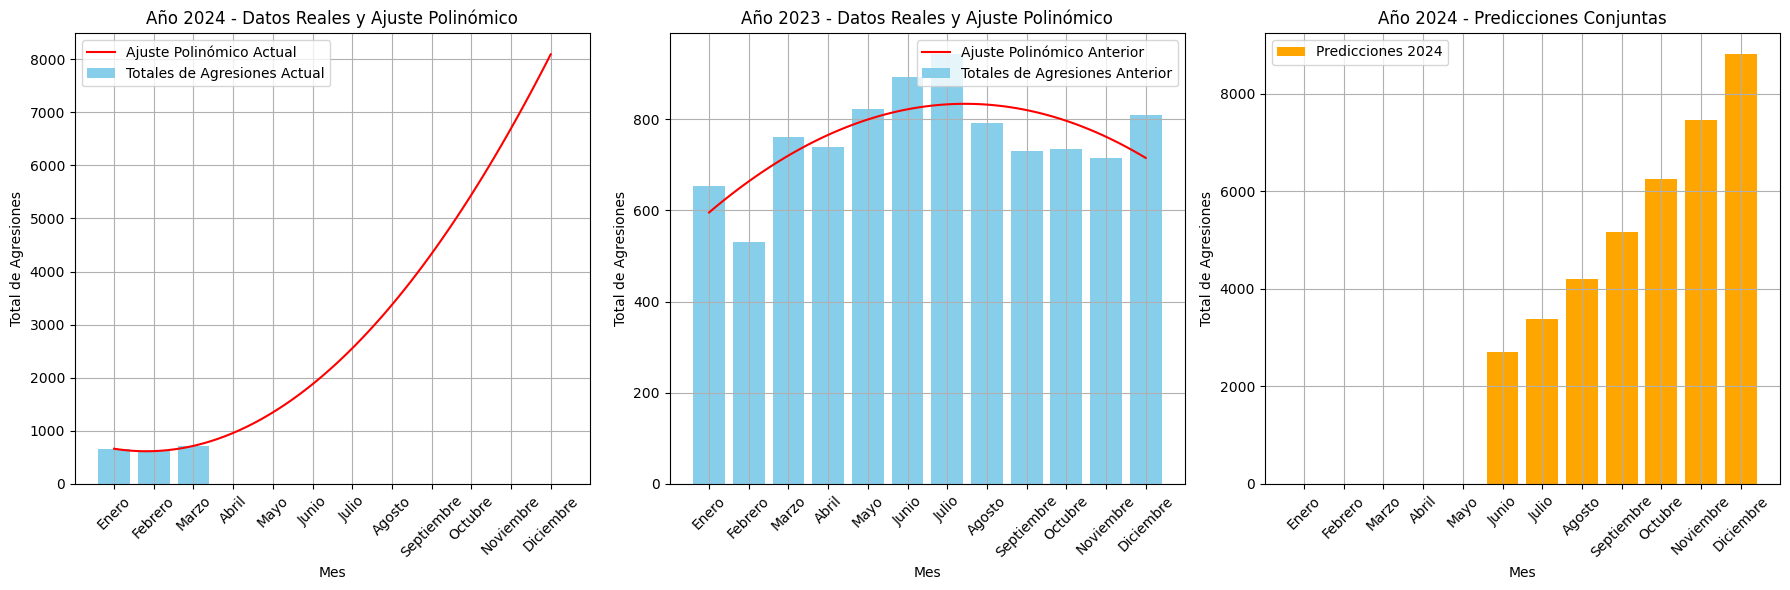

Predicciones de Agresiones para los Meses del 6 al 12 - Año Actual:
          Mes  Agresiones_Actual
0       Junio             1879.0
1       Julio             2554.0
2      Agosto             3373.0
3  Septiembre             4336.0
4     Octubre             5443.0
5   Noviembre             6694.0
6   Diciembre             8089.0

Predicciones de Agresiones para los Meses del 6 al 12 - Año Anterior:
          Mes  Agresiones_Anterior
0       Junio           821.463287
1       Julio           832.333916
2      Agosto           831.750500
3  Septiembre           819.713037
4     Octubre           796.221528
5   Noviembre           761.275974
6   Diciembre           714.876374

Predicciones de Agresiones para los Meses del 6 al 12 - Año 2024 (Conjunto):
           Mes  Agresiones_2024
0        Enero         0.000000
1      Febrero         0.000000
2        Marzo         0.000000
3        Abril         0.000000
4         Mayo         0.000000
5        Junio      2700.463287
6        Julio 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Rutas de los archivos CSV
ruta_csv_2023 = 'activaciones_samur_2023.csv'
ruta_csv_2024 = 'activaciones_samur_2024.csv'

# Cargar datos
df_2023 = pd.read_csv(ruta_csv_2023, sep=';')
df_2024 = pd.read_csv(ruta_csv_2024, sep=';')

# Filtrar los datos de agresiones
df_agresiones_2023 = df_2023[df_2023["Código"].isin(["Agresión sin especificar", "Agresión con spray de defensa"])]
df_agresiones_2024 = df_2024[df_2024["Código"].isin(["Agresión sin especificar", "Agresión con spray de defensa"])]

# Inicializar diccionarios para almacenar el total de agresiones por mes
agresiones_por_mes_actual = {mes: 0 for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]}
agresiones_por_mes_anterior = {mes: 0 for mes in ["enero", "febrero", "marzo", "abril", "mayo", "junio", "julio", "agosto", "septiembre", "octubre", "noviembre", "diciembre"]}

# Contar el número de agresiones por mes
for index, row in df_agresiones_2024.iterrows():
    mes = row["Mes"].lower()
    agresiones_por_mes_actual[mes] += 1

for index, row in df_agresiones_2023.iterrows():
    mes = row["Mes"].lower()
    agresiones_por_mes_anterior[mes] += 1

# Seleccionar las columnas relevantes y agrupar por distrito y mes
df_sel_24 = df_agresiones_2024[["Distrito", "Mes"]]
df_agrupado_24 = df_sel_24.groupby(["Distrito", "Mes"]).size().to_frame(name="Número de agresiones").sort_values(by=["Número de agresiones"], ascending=False)

df_sel_23 = df_agresiones_2023[["Distrito", "Mes"]]
df_agrupado_23 = df_sel_23.groupby(["Distrito", "Mes"]).size().to_frame(name="Número de agresiones").sort_values(by=["Número de agresiones"], ascending=False)

# Mostrar los DataFrames agrupados
print(df_agrupado_24.to_string())
print(df_agrupado_23.to_string())

# Asignar un valor numérico a cada mes
meses_dict = {
    "enero": 1,
    "febrero": 2,
    "marzo": 3,
    "abril": 4,
    "mayo": 5,
    "junio": 6,
    "julio": 7,
    "agosto": 8,
    "septiembre": 9,
    "octubre": 10,
    "noviembre": 11,
    "diciembre": 12
}

# Filtrar los meses con más de 0 agresiones
meses_con_agresiones_actual = [meses_dict[mes] for mes in agresiones_por_mes_actual if agresiones_por_mes_actual[mes] > 0]
totales_agresiones_actual = [agresiones_por_mes_actual[mes] for mes in agresiones_por_mes_actual if agresiones_por_mes_actual[mes] > 0]

meses_con_agresiones_anterior = [meses_dict[mes] for mes in agresiones_por_mes_anterior if agresiones_por_mes_anterior[mes] > 0]
totales_agresiones_anterior = [agresiones_por_mes_anterior[mes] for mes in agresiones_por_mes_anterior if agresiones_por_mes_anterior[mes] > 0]

# Ajuste polinómico de segundo grado
coeficientes_actual = np.polyfit(meses_con_agresiones_actual, totales_agresiones_actual, 2)
polinomio_actual = np.poly1d(coeficientes_actual)

coeficientes_anterior = np.polyfit(meses_con_agresiones_anterior, totales_agresiones_anterior, 2)
polinomio_anterior = np.poly1d(coeficientes_anterior)

# Crear puntos para la curva de ajuste
x_ajuste_actual = np.linspace(1, 12, 100)
y_ajuste_actual = polinomio_actual(x_ajuste_actual)

x_ajuste_anterior = np.linspace(1, 12, 100)
y_ajuste_anterior = polinomio_anterior(x_ajuste_anterior)

# Predecir el número de agresiones
predicciones_actual = [(list(meses_dict.keys())[list(meses_dict.values()).index(mes_num)].capitalize(), polinomio_actual(mes_num)) for mes_num in range(6, 13)]
predicciones_anterior = [(list(meses_dict.keys())[list(meses_dict.values()).index(mes_num)].capitalize(), polinomio_anterior(mes_num)) for mes_num in range(6, 13)]

# Crear DataFrames con las predicciones
df_predicciones_actual = pd.DataFrame(predicciones_actual, columns=['Mes', 'Agresiones_Actual'])
df_predicciones_anterior = pd.DataFrame(predicciones_anterior, columns=['Mes', 'Agresiones_Anterior'])

# Unir las predicciones para el año 2024
predicciones_2024 = []
for mes_num in range(1, 13):
    mes_actual = list(meses_dict.keys())[list(meses_dict.values()).index(mes_num)]
    prediccion_actual = polinomio_actual(mes_num) if mes_num >= 6 else 0
    prediccion_anterior = polinomio_anterior(mes_num) if mes_num >= 6 else 0
    prediccion_conjunta = prediccion_actual + prediccion_anterior
    predicciones_2024.append((mes_actual.capitalize(), prediccion_conjunta))

df_predicciones_2024 = pd.DataFrame(predicciones_2024, columns=['Mes', 'Agresiones_2024'])

# Graficar los totales por mes y la curva de ajuste para ambos años y las predicciones conjuntas para el año 2024
plt.figure(figsize=(18, 6))

# Gráfico para el año actual
plt.subplot(1, 3, 1)
plt.bar(range(1, 13), [agresiones_por_mes_actual[mes] for mes in meses_dict.keys()], color='skyblue', label='Totales de Agresiones Actual')
plt.plot(x_ajuste_actual, y_ajuste_actual, color='red', label='Ajuste Polinómico Actual')
plt.xlabel('Mes')
plt.ylabel('Total de Agresiones')
plt.title('Año 2024 - Datos Reales y Ajuste Polinómico')
plt.xticks(ticks=range(1, 13), labels=[mes.capitalize() for mes in meses_dict.keys()], rotation=45)
plt.legend()
plt.grid(True)

# Gráfico para el año anterior
plt.subplot(1, 3, 2)
plt.bar(range(1, 13), [agresiones_por_mes_anterior[mes] for mes in meses_dict.keys()], color='skyblue', label='Totales de Agresiones Anterior')
plt.plot(x_ajuste_anterior, y_ajuste_anterior, color='red', label='Ajuste Polinómico Anterior')
plt.xlabel('Mes')
plt.ylabel('Total de Agresiones')
plt.title('Año 2023 - Datos Reales y Ajuste Polinómico')
plt.xticks(ticks=range(1, 13), labels=[mes.capitalize() for mes in meses_dict.keys()], rotation=45)
plt.legend()
plt.grid(True)

# Gráfico para el año 2024 (predicciones conjuntas)
plt.subplot(1, 3, 3)
plt.bar(range(1, 13), df_predicciones_2024['Agresiones_2024'], color='orange', label='Predicciones 2024')
plt.xlabel('Mes')
plt.ylabel('Total de Agresiones')
plt.title('Año 2024 - Predicciones Conjuntas')
plt.xticks(ticks=range(1, 13), labels=[mes.capitalize() for mes in meses_dict.keys()], rotation=45)
plt.legend()
plt.grid(True)

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()

# Mostrar los DataFrames con las predicciones
print("Predicciones de Agresiones para los Meses del 6 al 12 - Año Actual:")
print(df_predicciones_actual)

print("\nPredicciones de Agresiones para los Meses del 6 al 12 - Año Anterior:")
print(df_predicciones_anterior)

# Mostrar las predicciones conjuntas para el año 2024
print("\nPredicciones de Agresiones para los Meses del 6 al 12 - Año 2024 (Conjunto):")
print(df_predicciones_2024)
